### INS-Flagger_ML_Notebook

### Idea : To predict if a ship entering India's sea border is a red Flag [i.e. a ship is a possible risk to our country] or not provided all the details provided for that ship to our system (based on the satellite image taken).

### Our idea of this project is to consume historical records worth 100K data points corresponding to the ships entering the sea border of India, which contains following information about a each ship.

1. ShipName : Name of the ship
2. CountryEnteringFrom : Country form which ship is entering from
3. Latitude : Latitude at which ship is pointed
4. Longitude : Longitude at which ship is pointed
5. PortReportedAt : Port in India ship is reported at
6. StateOfThePort : Sate in India ship is reported at
7. ProminentColorOnTheShip : Color on the ship
8. ContainersVisibleOnTheShip : Is container visible on the ship in the sattelite image
9. ApproximateLengthOfTheShipInFeet : ApproximateLengthOfTheShipInFeet
10. ApproximateWidthOfTheShipInFeet : ApproximateWidthOfTheShipInFeet
11. ApproximateDraftOfTheShipInFeet : ApproximateDraftOfTheShipInFeet
12. ApproximateCapacityOfTheShipInTons : ApproximateCapacityOfTheShipInTons
13. ApproximateNumberOfPeopleOnTheShipVisible : Approximate number of people on the ship visible in the sattelite image
14. IsFlagged : Is this ship Red flagged or not

#### We will perform KDD (Knowledge Data Discovery) process on the above data which contains following stages
1. Data Selection
2. Data Analysis [Exploratory Data Analysis]
3. Data Preprocessing and Cleansing
4. Data Transformation
5. Data Modelling
6. Model Evaluation & Interpretation

#### Once we have a model in place, tomorrow when a new ship enters our radar; we will predict if that ship needs to be red flagged or not based on the data provided to us for the respective ship.
 




In [145]:
!pip install yellowbrick
!pip install pymysql

   ---------------------------------------- 45.0/45.0 kB 2.2 MB/s eta 0:00:00


#### Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

In [23]:
# import libraries and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

#from yellowbrick.classifier import ClassificationReport, ROCAUC
warnings.filterwarnings('ignore')

data = pd.read_csv('INS_Flagger_dataset_100000_records',header='infer')
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop(['ShipName'], axis=1)
data.head()

,PortReportedAt,StateOfThePort,CountryEnteringFrom,Latitude,Longitude,ProminentColorOnTheShip,ContainersVisibleOnTheShip,ApproximateLengthOfTheShipInFeet,ApproximateWidthOfTheShipInFeet,ApproximateDraftOfTheShipInFeet,ApproximateCapacityOfTheShipInTons,ApproximateNumberOfPeopleOnTheShipVisible,IsFlagged
0,Tuticorin,TamilNadu,SriLanka,55.000924,-24.994717,Yellow,No,1238,230,90,519578,292,No
1,Kandla,Gujarat,Pakisthan,127.005821,-11.997614,Black,No,1296,246,73,314852,987,Yes
2,Kolkata,WestBengal,Bangladesh,48.007655,84.000499,Orange,No,911,114,78,199450,565,No
3,Kochi,Kerala,Maldives,-113.992040,19.009165,Yellow,No,885,192,78,508982,310,No
4,Chennai,TamilNadu,Indonesia,-59.992757,-76.993107,Blue,No,815,296,35,565886,680,No


In [24]:
#check datatype
data.dtypes

PortReportedAt                                object
StateOfThePort                                object
CountryEnteringFrom                           object
Latitude                                     float64
Longitude                                    float64
ProminentColorOnTheShip                       object
ContainersVisibleOnTheShip                    object
ApproximateLengthOfTheShipInFeet               int64
ApproximateWidthOfTheShipInFeet                int64
ApproximateDraftOfTheShipInFeet                int64
ApproximateCapacityOfTheShipInTons             int64
ApproximateNumberOfPeopleOnTheShipVisible      int64
IsFlagged                                     object
dtype: object

In [25]:
#describe variables
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Latitude,100000.0,-0.352699,104.254434,-179.999984,-90.991456,-0.995055,90.006450,180.009990
Longitude,100000.0,-0.236156,52.244208,-89.999869,-44.999767,0.000367,45.004745,90.009997
ApproximateLengthOfTheShipInFeet,100000.0,1300.054810,404.290832,600.000000,951.000000,1299.000000,1651.000000,2000.000000
ApproximateWidthOfTheShipInFeet,100000.0,180.375380,69.527889,60.000000,120.000000,180.000000,241.000000,300.000000
ApproximateDraftOfTheShipInFeet,100000.0,59.931040,17.571464,30.000000,45.000000,60.000000,75.000000,90.000000
ApproximateCapacityOfTheShipInTons,100000.0,349957.606870,144454.094361,100000.000000,224818.000000,350637.500000,475109.250000,599995.000000
ApproximateNumberOfPeopleOnTheShipVisible,100000.0,534.771100,269.410638,70.000000,302.000000,534.000000,769.000000,1000.000000


In [26]:
#check shape
print("Shape of data :",data.shape)

Shape of data : (100000, 13)


In [27]:
#check for null values in data
print("Find number of missing values in data :")
print(data.isnull().values.any())

print("Number of missing values in data :", data.isnull().sum().sum())

Find number of missing values in data :
False
Number of missing values in data : 0


In [28]:
#Number of unique in each column?
pd.Series({col: len(pd.unique(data[col])) for col in data})

PortReportedAt                                   11
StateOfThePort                                   10
CountryEnteringFrom                              12
Latitude                                     100000
Longitude                                    100000
ProminentColorOnTheShip                           6
ContainersVisibleOnTheShip                        2
ApproximateLengthOfTheShipInFeet               1401
ApproximateWidthOfTheShipInFeet                 241
ApproximateDraftOfTheShipInFeet                  61
ApproximateCapacityOfTheShipInTons            90704
ApproximateNumberOfPeopleOnTheShipVisible       931
IsFlagged                                         2
dtype: int64

In [29]:
# check for missing values and outliers
# Value counts of all categorical columns.
categorical_columns=['PortReportedAt','StateOfThePort','CountryEnteringFrom','ProminentColorOnTheShip','ContainersVisibleOnTheShip','IsFlagged']

for column in categorical_columns:
     print("\n" + column)
     print(data[column].value_counts())


PortReportedAt
Kandla             19181
PortBlair          18608
Mangalore          11586
MumbaiPortTrust     9859
Kolkata             9592
Tuticorin           6667
Kochi               6393
Mormugao            5328
Visakhapatnam       4795
Chennai             4794
Paradip             3197
Name: PortReportedAt, dtype: int64

StateOfThePort
Gujarat                   19181
Andaman&NicobarIslands    18608
Karnataka                 11586
TamilNadu                 11461
Maharashtra                9859
WestBengal                 9592
Kerala                     6393
Goa                        5328
AndhraPradesh              4795
Odisha                     3197
Name: StateOfThePort, dtype: int64

CountryEnteringFrom
Pakisthan       19181
Bangladesh      12789
Maldives        11721
SriLanka        11462
Oman             6792
Thailand         6667
Maynmar          6666
Malaysia         5275
Afghanisthan     5063
China            4796
Indonesia        4794
Iran             4794
Name: CountryEnter

In [30]:
#Univariate Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   PortReportedAt                             100000 non-null  object 
 1   StateOfThePort                             100000 non-null  object 
 2   CountryEnteringFrom                        100000 non-null  object 
 3   Latitude                                   100000 non-null  float64
 4   Longitude                                  100000 non-null  float64
 5   ProminentColorOnTheShip                    100000 non-null  object 
 6   ContainersVisibleOnTheShip                 100000 non-null  object 
 7   ApproximateLengthOfTheShipInFeet           100000 non-null  int64  
 8   ApproximateWidthOfTheShipInFeet            100000 non-null  int64  
 9   ApproximateDraftOfTheShipInFeet            100000 non-null  int64  
 10  Approxima

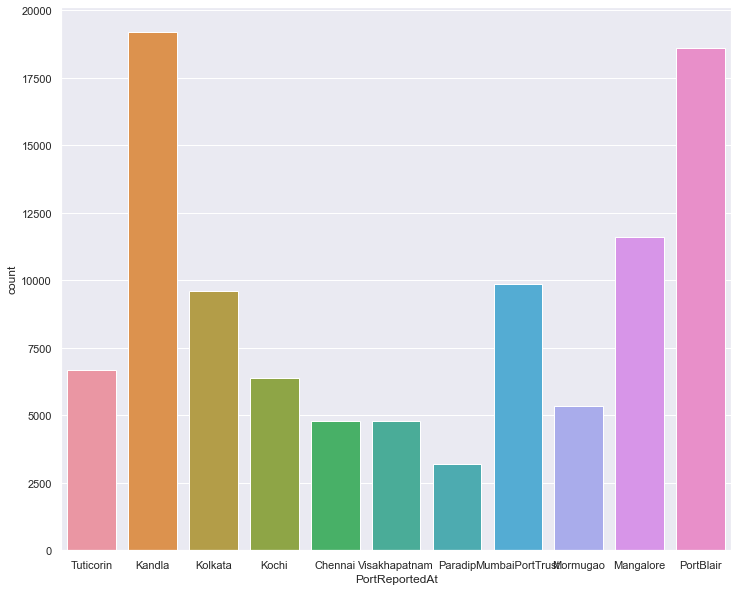

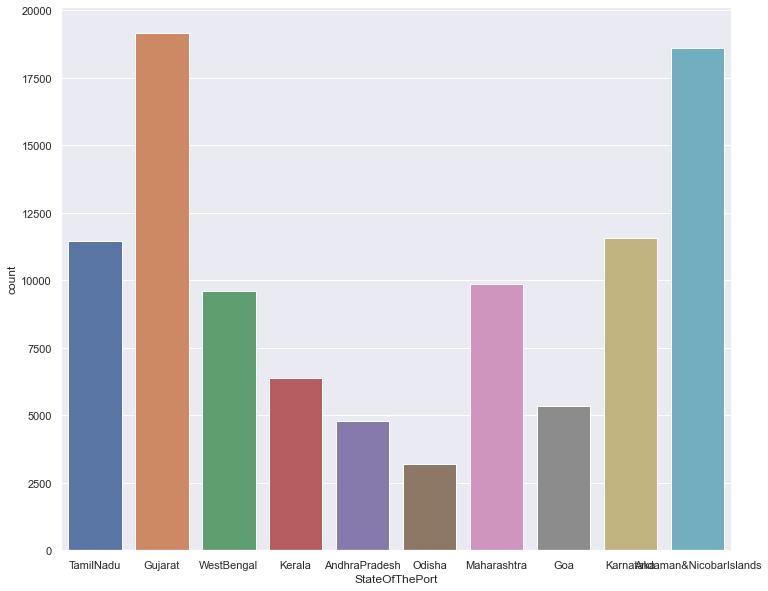

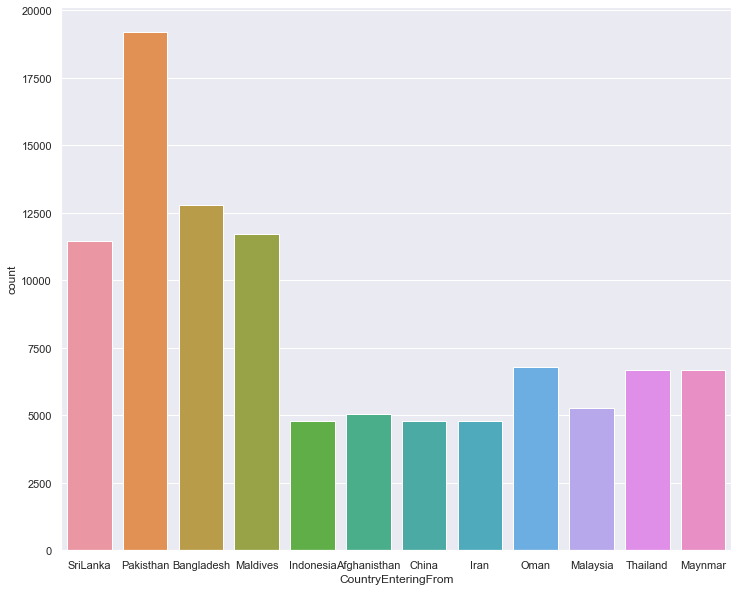

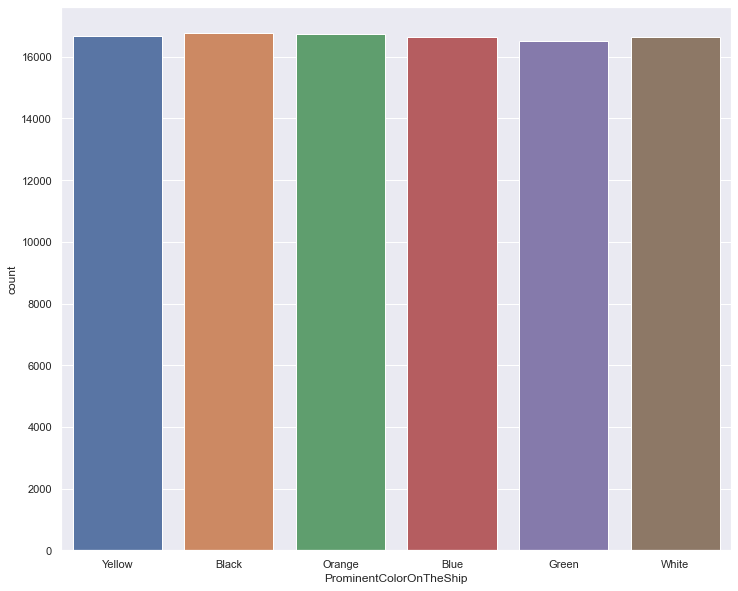

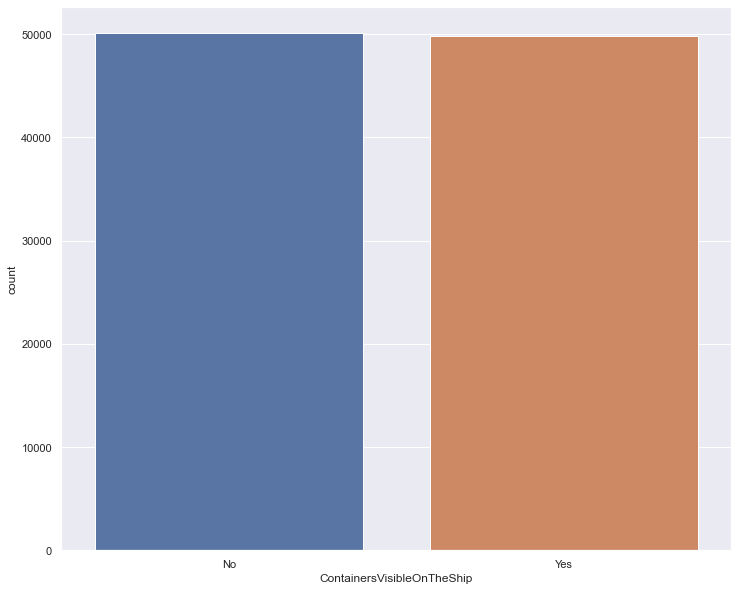

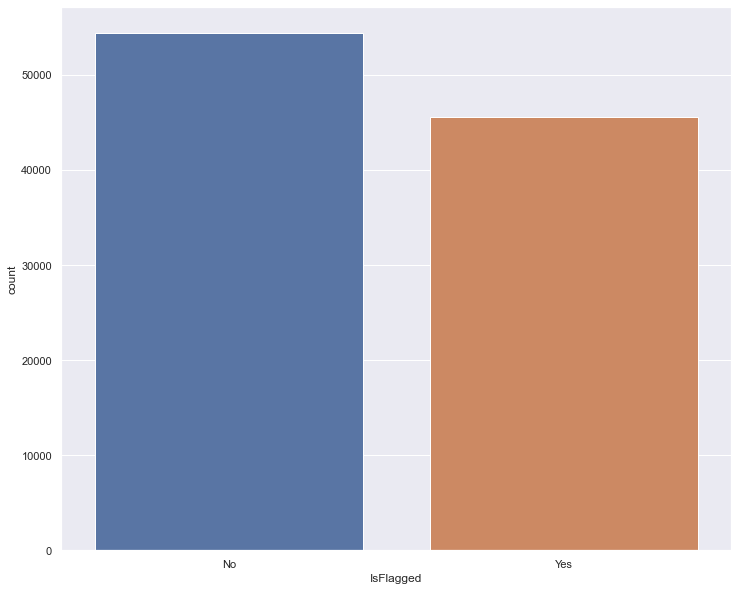

In [31]:
#Univariate Analysis
#count plot for categorical columns

for i in categorical_columns:
    countplot, ax = plt.subplots(figsize = (12,10))
    sns.set(font_scale=1)
    sns.countplot(data[i])
    plt.show()

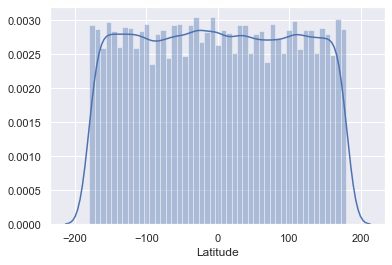

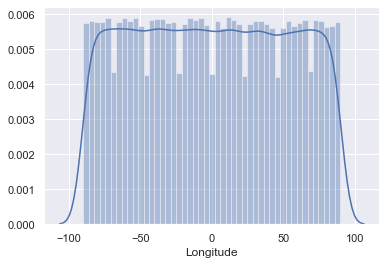

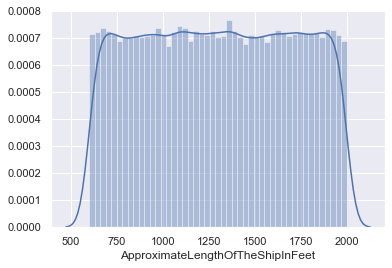

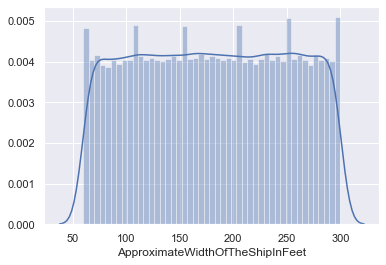

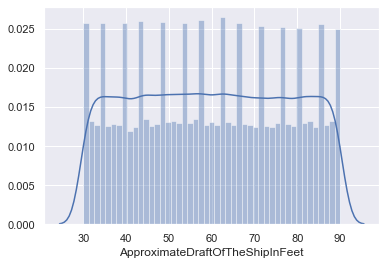

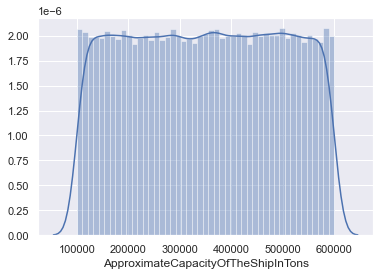

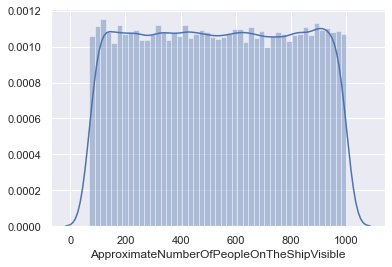

In [32]:
# distplot for continous columns
for i in ['Latitude','Longitude','ApproximateLengthOfTheShipInFeet','ApproximateWidthOfTheShipInFeet','ApproximateDraftOfTheShipInFeet',
         'ApproximateCapacityOfTheShipInTons','ApproximateNumberOfPeopleOnTheShipVisible']:
    sns.distplot(data[i])
    plt.show()

In [33]:
data.head()

,PortReportedAt,StateOfThePort,CountryEnteringFrom,Latitude,Longitude,ProminentColorOnTheShip,ContainersVisibleOnTheShip,ApproximateLengthOfTheShipInFeet,ApproximateWidthOfTheShipInFeet,ApproximateDraftOfTheShipInFeet,ApproximateCapacityOfTheShipInTons,ApproximateNumberOfPeopleOnTheShipVisible,IsFlagged
0,Tuticorin,TamilNadu,SriLanka,55.000924,-24.994717,Yellow,No,1238,230,90,519578,292,No
1,Kandla,Gujarat,Pakisthan,127.005821,-11.997614,Black,No,1296,246,73,314852,987,Yes
2,Kolkata,WestBengal,Bangladesh,48.007655,84.000499,Orange,No,911,114,78,199450,565,No
3,Kochi,Kerala,Maldives,-113.992040,19.009165,Yellow,No,885,192,78,508982,310,No
4,Chennai,TamilNadu,Indonesia,-59.992757,-76.993107,Blue,No,815,296,35,565886,680,No


####  Multivariate analysis

In [34]:
#Bivariate Analysis - calculate the correlation matrix
#Lets see correlation between site_eui and other columns in sets
numerical_variables_list=["Latitude","Longitude","ApproximateLengthOfTheShipInFeet",
                          "ApproximateWidthOfTheShipInFeet","ApproximateDraftOfTheShipInFeet",
                          "ApproximateCapacityOfTheShipInTons","ApproximateNumberOfPeopleOnTheShipVisible"]
#make dataset with only numerical columns
data_numerical = data[numerical_variables_list].copy()

corr = data_numerical.corr()
sns.set(font_scale=10)


plt.figure(figsize=(100,100))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot = True)

<AxesSubplot:>

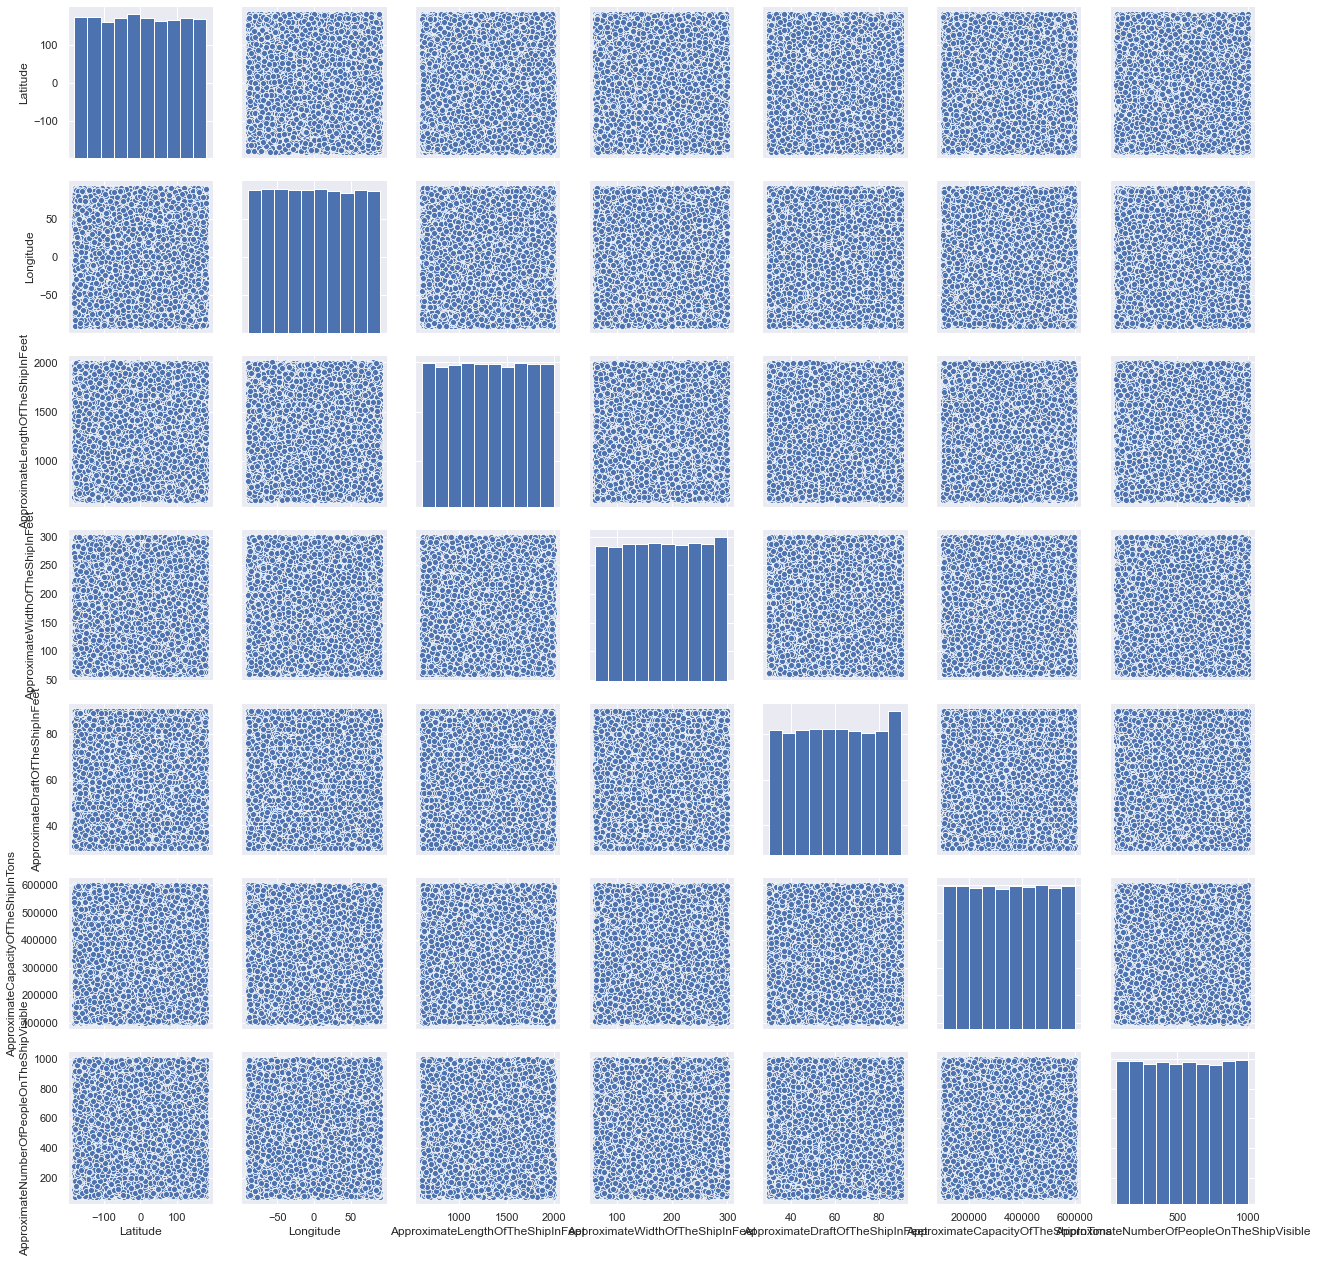

In [35]:
#Pair Plot
sns.set(font_scale=1)
sns.pairplot(data)

#### Prepare the data for analytics
##### 1. Ensure the attribute types are correct. If not, take appropriate actions.
##### 2. Get the data model ready.
##### 3. Transform the data i.e. scale / normalize if required
##### 4. Create the training set and test set in ratio of 70:30

In [38]:
## Define X and Y variables
X = data.drop('IsFlagged', axis=1)
Y = data[['IsFlagged']]

In [39]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [90]:
##Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

#### Create the ensemble model
##### 1. First create models using Logistic Regression and Decision Tree algorithm.

##### Logistic Regression

In [91]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=7)

In [92]:
y_predict = logreg.predict(X_test)

In [93]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.5455857142857143

Testing accuracy 0.542

Confusion Matrix


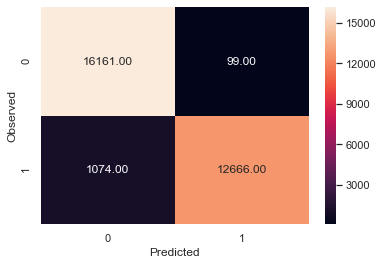

None



In [136]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()

#Create Metric Comparision Dataframe
metric_data = [['Logistic Regression',logreg.score(X_test, y_test)*100]] 
metric_df = pd.DataFrame(metric_data)

##### Decision Tree

In [95]:
model_entropy = DecisionTreeClassifier(criterion='gini',max_features=8)

In [96]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(max_features=8)

In [97]:
y_predict = model_entropy.predict(X_test)

Trainig accuracy 1.0

Testing accuracy 0.9360333333333334

Confusion Matrix


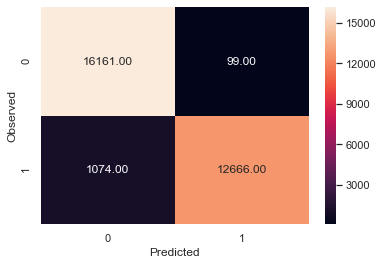

None



In [137]:
print("Trainig accuracy",model_entropy.score(X_train,y_train))  
print()
print("Testing accuracy",model_entropy.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()

#Create Metric Comparision Dataframe
metric_data = [['Decision Tree',model_entropy.score(X_test, y_test)*100]] 
metric_df = metric_df.append(metric_data)

##### 2. Build the ensemble models (Bagging and Boosting)

##### Algorithm 1 - Apply Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy',max_features=8)
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)
rfcl.score(X_test, y_test)

0.9609

Trainig accuracy 1.0

Testing accuracy 0.9609

Confusion Matrix


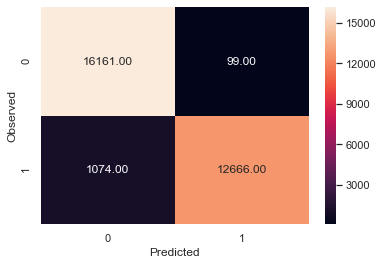

None



In [138]:
print("Trainig accuracy",rfcl.score(X_train,y_train))  
print()
print("Testing accuracy",rfcl.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()


#Create Metric Comparision Dataframe
metric_data = [['Random Forest',rfcl.score(X_test, y_test)*100]] 
metric_df = metric_df.append(metric_data)


##### Algorithm 2 : Apply Adaboost Ensemble Algorithm

In [101]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier()
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)
abcl.score(X_test, y_test)

0.9609333333333333

Trainig accuracy 0.9619

Testing accuracy 0.9609333333333333

Confusion Matrix


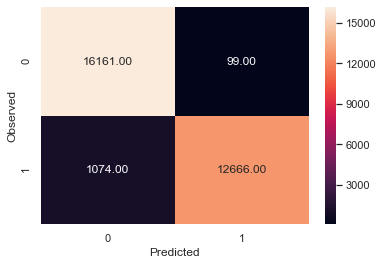

None



In [139]:
print("Trainig accuracy",abcl.score(X_train,y_train))  
print()
print("Testing accuracy",abcl.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
#Create Metric Comparision Dataframe
metric_data = [['Adaboost Ensemble',abcl.score(X_test, y_test)*100]] 
metric_df = metric_df.append(metric_data)

##### Algorithm 3 : Apply Bagging Classifier Algorithm

In [103]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier()
bgcl = bgcl.fit(X_train, y_train)
y_predict = bgcl.predict(X_test)
bgcl.score(X_test, y_test)

0.9575

Trainig accuracy 0.9949142857142858

Testing accuracy 0.9575

Confusion Matrix


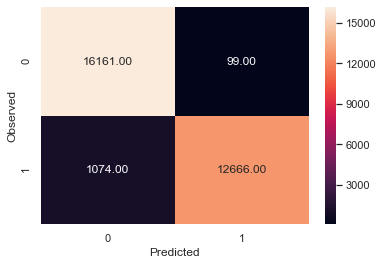

None



In [140]:
print("Trainig accuracy",bgcl.score(X_train,y_train))  
print()
print("Testing accuracy",bgcl.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
#Create Metric Comparision Dataframe
metric_data = [['Bagging Classifier',bgcl.score(X_test, y_test)*100]] 
metric_df = metric_df.append(metric_data)

##### Algorithm 4 : Apply GradientBoost Classifier Algorithm

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier()
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)
gbcl.score(X_test, y_test)

0.9609333333333333

In [143]:
X_test

,Latitude,Longitude,ApproximateLengthOfTheShipInFeet,ApproximateWidthOfTheShipInFeet,ApproximateDraftOfTheShipInFeet,ApproximateCapacityOfTheShipInTons,ApproximateNumberOfPeopleOnTheShipVisible,PortReportedAt_Kandla,PortReportedAt_Kochi,PortReportedAt_Kolkata,...,CountryEnteringFrom_Oman,CountryEnteringFrom_Pakisthan,CountryEnteringFrom_SriLanka,CountryEnteringFrom_Thailand,ProminentColorOnTheShip_Blue,ProminentColorOnTheShip_Green,ProminentColorOnTheShip_Orange,ProminentColorOnTheShip_White,ProminentColorOnTheShip_Yellow,ContainersVisibleOnTheShip_Yes
33909,119.005021,58.007439,1682,163,64,128158,516,0,1,0,...,0,0,0,0,0,1,0,0,0,1
92307,-133.997766,6.005862,637,256,41,346262,784,0,1,0,...,0,0,0,0,0,0,1,0,0,1
89107,-114.998260,-34.992925,1533,244,68,481944,285,1,0,0,...,0,1,0,0,0,0,1,0,0,1
9538,-98.997273,39.005937,617,163,49,536629,923,0,0,1,...,0,0,0,0,0,0,0,1,0,1
31008,111.008471,39.002176,1896,164,57,435085,316,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90469,87.002034,23.001040,1589,109,53,102740,604,1,0,0,...,0,1,0,0,0,0,1,0,0,0
93442,-83.990509,59.007190,1188,232,63,249233,181,0,0,1,...,0,0,0,0,0,0,0,1,0,0
39595,178.007508,62.001369,1419,230,90,596021,864,0,0,0,...,0,0,1,0,0,0,1,0,0,1
13187,-147.996232,80.000976,1791,66,43,292658,669,1,0,0,...,0,1,0,0,0,0,0,1,0,0


Trainig accuracy 0.9619142857142857

Testing accuracy 0.9609333333333333

Confusion Matrix


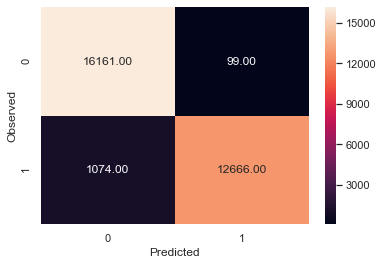

None



In [141]:
print("Trainig accuracy",gbcl.score(X_train,y_train))  
print()
print("Testing accuracy",gbcl.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
#Create Metric Comparision Dataframe
metric_data = [['Gradient Boosting Classifier',gbcl.score(X_test, y_test)*100]] 
metric_df = metric_df.append(metric_data)

##### 3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it.

In [142]:
import pandas as pd 
metric_df.columns = ["AlgorithmName", "Accuracyin%"]
metric_df

,AlgorithmName,Accuracyin%
0,Logistic Regression,54.200000
0,Decision Tree,93.603333
0,Random Forest,96.090000
0,Adaboost Ensemble,96.093333
0,Bagging Classifier,95.750000
0,Gradient Boosting Classifier,96.093333


## Out of all the models Gradient boosted tree has good accuracy and will use that model for predicting isFlagged field for any incoming new entries

### Prediction of IsFlagged for new record

#### Connect to database and get the record

In [205]:
import pymysql
import pandas as a
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='test',db='testDb')
dataToBePredictedOn=a.read_sql_query("SELECT * FROM ship_details where is_flagged is null",conn)
dataToBePredictedOn

,id,accuracy_of_the_current_model,approximate_capacity_of_the_ship_in_tons,approximate_draft_of_the_ship_in_feet,approximate_length_of_the_ship_in_feet,approximate_number_of_people_on_the_ship_visible,approximate_width_of_the_ship_in_feet,containers_visible_on_the_ship,country_entering_from,is_flagged,latitude,longitude,port_reported_at,prominent_color_on_the_ship,ship_name,state_of_the_port
0,52,None,1000,10,54,300,22,No,SriLanka,None,33.271,-22.384,Visakhapatnam,Green,Ship-Navin 292,AndhraPradesh


In [206]:

dataToBePredictedOnTransposed=pd.DataFrame()

for index, row in dataToBePredictedOn.iterrows():
    new_row = pd.Series(np.array([row['latitude'],
                                  row['longitude'],
                                  row['approximate_length_of_the_ship_in_feet'],
                                  row['approximate_width_of_the_ship_in_feet'],
                                  row['approximate_draft_of_the_ship_in_feet'],
                                  row['approximate_capacity_of_the_ship_in_tons'],
                                  row['approximate_number_of_people_on_the_ship_visible'],
                                  1 if row['port_reported_at']=='Kandla' else 0 ,
                                  1 if row['port_reported_at']=='Kochi' else 0 ,
                                  1 if row['port_reported_at']=='Kolkata' else 0 ,
                                  1 if row['port_reported_at']=='Mangalore' else 0 ,
                                  1 if row['port_reported_at']=='Mormugao' else 0 ,
                                  1 if row['port_reported_at']=='MumbaiPortTrust' else 0 ,
                                  1 if row['port_reported_at']=='Paradip' else 0 ,
                                  1 if row['port_reported_at']=='PortBlair' else 0 ,
                                  1 if row['port_reported_at']=='Tuticorin' else 0 ,
                                  1 if row['port_reported_at']=='Visakhapatnam' else 0 ,
                                  1 if row['state_of_the_port']=='AndhraPradesh' else 0 ,
                                  1 if row['state_of_the_port']=='Goa' else 0 ,
                                  1 if row['state_of_the_port']=='Gujarat' else 0 ,
                                  1 if row['state_of_the_port']=='Karnataka' else 0 ,
                                  1 if row['state_of_the_port']=='Kerala' else 0 ,
                                  1 if row['state_of_the_port']=='Maharashtra' else 0 ,
                                  1 if row['state_of_the_port']=='Odisha' else 0 ,
                                  1 if row['state_of_the_port']=='TamilNadu' else 0 ,
                                  1 if row['state_of_the_port']=='WestBengal' else 0 ,
                                  1 if row['country_entering_from']=='Bangladesh' else 0 ,
                                  1 if row['country_entering_from']=='China' else 0 ,
                                  1 if row['country_entering_from']=='Indonesia' else 0 ,
                                  1 if row['country_entering_from']=='Iran' else 0 ,
                                  1 if row['country_entering_from']=='Malaysia' else 0 ,
                                  1 if row['country_entering_from']=='Maldives' else 0 ,
                                  1 if row['country_entering_from']=='Maynmar' else 0 ,
                                  1 if row['country_entering_from']=='Oman' else 0 ,
                                  1 if row['country_entering_from']=='Pakisthan' else 0 ,
                                  1 if row['country_entering_from']=='SriLanka' else 0 ,
                                  1 if row['country_entering_from']=='Thailand' else 0 ,
                                  1 if row['prominent_color_on_the_ship']=='Blue' else 0 ,
                                  1 if row['prominent_color_on_the_ship']=='Green' else 0 ,
                                  1 if row['prominent_color_on_the_ship']=='Orange' else 0 ,
                                  1 if row['prominent_color_on_the_ship']=='White' else 0 ,
                                  1 if row['prominent_color_on_the_ship']=='Yellow' else 0 ,
                                  1 if row['containers_visible_on_the_ship']=='Yes' else 0 ,
                                 ]), index=X_test.columns)
    dataToBePredictedOnTransposed = dataToBePredictedOnTransposed.append(new_row, ignore_index=True)

In [207]:
dataToBePredictedOnTransposed

,ApproximateCapacityOfTheShipInTons,ApproximateDraftOfTheShipInFeet,ApproximateLengthOfTheShipInFeet,ApproximateNumberOfPeopleOnTheShipVisible,ApproximateWidthOfTheShipInFeet,ContainersVisibleOnTheShip_Yes,CountryEnteringFrom_Bangladesh,CountryEnteringFrom_China,CountryEnteringFrom_Indonesia,CountryEnteringFrom_Iran,...,ProminentColorOnTheShip_Yellow,StateOfThePort_AndhraPradesh,StateOfThePort_Goa,StateOfThePort_Gujarat,StateOfThePort_Karnataka,StateOfThePort_Kerala,StateOfThePort_Maharashtra,StateOfThePort_Odisha,StateOfThePort_TamilNadu,StateOfThePort_WestBengal
0,1000,10,54,300,22,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [208]:
#Predict the isFlagged flag
y_predict_new = gbcl.predict(dataToBePredictedOnTransposed)

In [209]:
y_predict_new

array(['Yes'], dtype=object)

In [ ]:
Based on our model this ship isFlagged="Yes".